<a href="https://colab.research.google.com/github/shreedharmalpani/soc_check/blob/main/random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torchvision


In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets


In [ ]:
train = datasets.MNIST("",train=True , download=True,transform= transforms.Compose([transforms.ToTensor()]))

test =datasets.MNIST("",train=False , download=True,transform= transforms.Compose([transforms.ToTensor()]))

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
trainset= torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)

testset= torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)

In [ ]:
for data in trainset:
 print(data)
 break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [ ]:
x,y= data[0][0] , data[1][0]
print(y)

tensor(0)


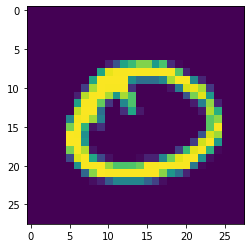

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28))
plt.show()

In [ ]:
for data in trainset:
  Xs,ys= data
  print(ys)
  break

tensor([7, 3, 3, 4, 7, 1, 4, 5, 6, 2])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Net(nn.Module):
 def __init__(self):
  super().__init__()
  self.fc1=nn.Linear(784, 64)
  self.fc2=nn.Linear(64, 64)
  self.fc3=nn.Linear(64, 64)
  self.fc4=nn.Linear(64, 10)

 def forward(self,x):
  x=F.relu(self.fc1(x))
  x=F.relu(self.fc2(x))
  x=F.relu(self.fc3(x))
  x=self.fc4(x)
  return F.log_softmax(x,dim=1)

net=Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
X=torch.rand((28,28))
X=X.view(-1,28*28)

In [ ]:
import torch.optim as optim

optimizer= optim.Adam(net.parameters(),lr=0.001)
EPOCHS=3
for epoch in range(EPOCHS):
 for data in trainset:
   #data is a batch of featuresets and labels
   X,y=data
   net.zero_grad()
   output= net(X.view(-1,28*28))
   loss=F.nll_loss(output,y)
   loss.backward()
   optimizer.step()
   print(loss)

Streaming output truncated to the last 5000 lines.
tensor(0.3690, grad_fn=<NllLossBackward>)
tensor(0.0116, grad_fn=<NllLossBackward>)
tensor(0.2375, grad_fn=<NllLossBackward>)
tensor(0.0040, grad_fn=<NllLossBackward>)
tensor(0.0047, grad_fn=<NllLossBackward>)
tensor(0.0055, grad_fn=<NllLossBackward>)
tensor(0.0021, grad_fn=<NllLossBackward>)
tensor(0.1508, grad_fn=<NllLossBackward>)
tensor(0.7117, grad_fn=<NllLossBackward>)
tensor(0.0020, grad_fn=<NllLossBackward>)
tensor(0.6613, grad_fn=<NllLossBackward>)
tensor(0.1527, grad_fn=<NllLossBackward>)
tensor(0.0102, grad_fn=<NllLossBackward>)
tensor(0.0062, grad_fn=<NllLossBackward>)
tensor(0.0312, grad_fn=<NllLossBackward>)
tensor(0.0071, grad_fn=<NllLossBackward>)
tensor(0.0004, grad_fn=<NllLossBackward>)
tensor(0.0144, grad_fn=<NllLossBackward>)
tensor(0.0295, grad_fn=<NllLossBackward>)
tensor(0.0456, grad_fn=<NllLossBackward>)
tensor(0.1461, grad_fn=<NllLossBackward>)
tensor(0.0565, grad_fn=<NllLossBackward>)
tensor(0.0051, grad_fn=<N

In [ ]:
correct =0
total=0

with torch.no_grad():
 for data in trainset:
    X,y = data
    output=net(X.view(-1,28*28))
    for idx,i in enumerate(output):
        if torch.argmax(i)==y[idx]:
         correct+=1
        total+=1   

print("accuracy :", round(correct/total,4)*100)

accuracy : 97.5


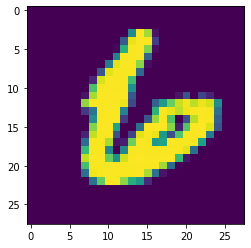

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()


In [ ]:
print(torch.argmax(net(X[1].view(-1,784))[0]))

tensor(6)
